Analisis de los datos del supermercado Carrefour

Preguntas a responder:
- ¿Cuáles son los productos que más cambian de precio según el día de la semana?
- ¿Existe un patrón de precios por región? (ejemplo: regiones o grupos de provincias 
    del país con precios muy elevados) Elegir alguna de las¿Las marcas propias de los 
    supermercados tienen precios más bajos que las marcas cadenas grandes delíderes?
    supermercado
- ¿Los precios de los productos esenciales (ejemplo: leche, pan, arroz) varían dependiendo 
    (Carrefour, Disco,del día de la semana? etc.)
- ¿Cómo influye el tipo de comercio (hipermercado, autoservicio, etc.) en los precios 
    de los productos?

Preguntas propias:
- Cuales son las marcas que tienen mayor visibilidad en los diferentes mercados?
- Que tipos de poductos son los que prefiere el mercado Argentino


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [4]:
# Carga de los datos 
productos_df = pd.read_csv('.datos/sepa_1_comercio-sepa-10_2025-03-07_09-05-11/productos.csv', sep='|')
productos_df.head()

/tmp/ipykernel_21658/1642064256.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  productos_df = pd.read_csv('./sepa_1_comercio-sepa-10_2025-03-07_09-05-11/productos.csv', sep='|')


,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2629.0,164.31,16.0,UNI,NaN,NaN,NaN,NaN
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN
4,10,1.0,2.0,7.791720e+12,1.0,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,3450.0,4181.82,825.0,GRM,NaN,NaN,NaN,NaN


In [50]:
# productos sin promociones
productos_sp_df = productos_df[productos_df['productos_precio_unitario_promo1'].isnull() & productos_df['productos_precio_unitario_promo2'].isnull()]

# productos con valor en promo1
productos_p1_df = productos_df.dropna(subset=['productos_precio_unitario_promo1'])

# productos con valor en promo2
productos_p2_df = productos_df.dropna(subset=['productos_precio_unitario_promo2'])



In [55]:
productos_sp_df = productos_sp_df.drop(2180654)

In [56]:
print(f"Longitud de productos_sp_df: {len(productos_sp_df)}, productos_p1_df: {len(productos_p1_df)}, productos_p2_df: {len(productos_p2_df)}")

Longitud de productos_sp_df: 2097284, productos_p1_df: 83370, productos_p2_df: 0


In [75]:
print(f"nulos en productos_sp_df: {productos_sp_df['productos_precio_lista'].isnull().sum()}, productos_p1_df: {productos_p1_df['productos_precio_unitario_promo1'].isnull().sum()}, productos_p2_df: {productos_p2_df['productos_precio_unitario_promo2'].isnull().sum()}")


nulos en productos_sp_df: 0, productos_p1_df: 0, productos_p2_df: 0


In [77]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
print(productos_df[['productos_precio_lista', 'productos_precio_unitario_promo1', 'productos_precio_unitario_promo2']].describe())

       productos_precio_lista  productos_precio_unitario_promo1  \
count      2180654.0000000000                  83370.0000000000   
mean          9957.3120879378                  82496.4498017273   
std          80662.8545178933                 280742.6283659636   
min             10.0000000000                     45.0000000000   
25%           1550.0000000000                   1090.0000000000   
50%           2649.0000000000                   2190.0000000000   
75%           4930.0000000000                   5990.0000000000   
max        7300000.0000000000                4905000.0000000000   

       productos_precio_unitario_promo2  
count                      0.0000000000  
mean                                NaN  
std                                 NaN  
min                                 NaN  
25%                                 NaN  
50%                                 NaN  
75%                                 NaN  
max                                 NaN  


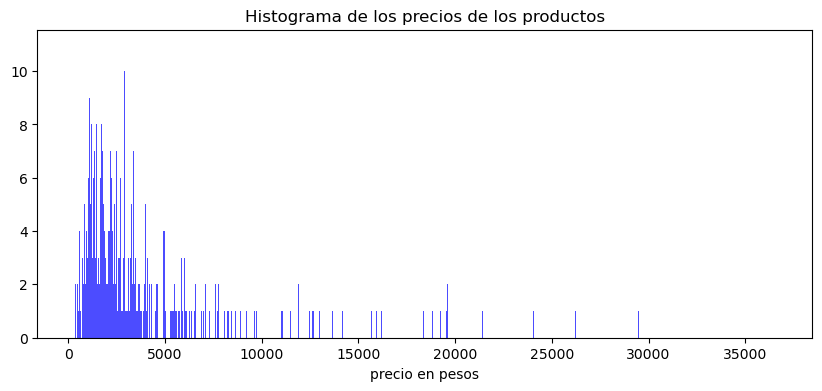

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))

subset = productos_df['productos_precio_lista'][0:500]
subset2 = subset[subset<50000]
ax.hist(subset2, bins=1000, color='blue', alpha=0.7)

ax.set_title('Histograma de los precios de los productos')
ax.set_xlabel('precio en pesos')
plt.show()

se observa una acumulacion de valores entre 0 y 5000 pesos, ademas de una enorme dispersion de los datos dado que los productos no comparten precios iguales pero si cercanos 

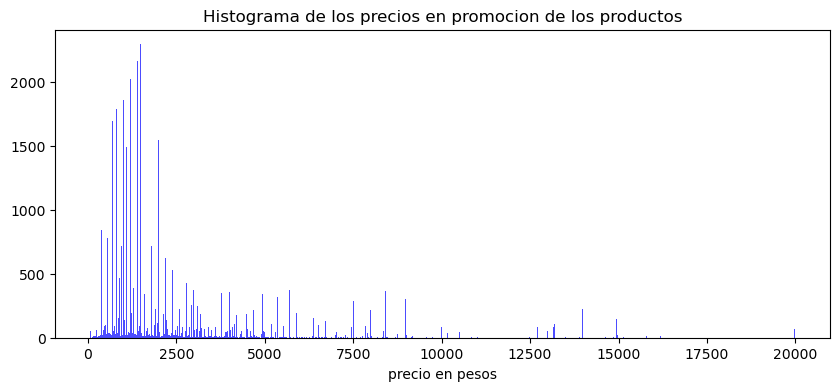

In [66]:
fig, ax = plt.subplots(figsize=(10, 4))

subset = productos_p1_df['productos_precio_unitario_promo1'][0:50000]
subset2 = subset[subset<20000]
ax.hist(subset2, bins=1000, color='blue', alpha=0.7)

ax.set_title('Histograma de los precios en promocion de los productos')
ax.set_xlabel('precio en pesos')
plt.show()

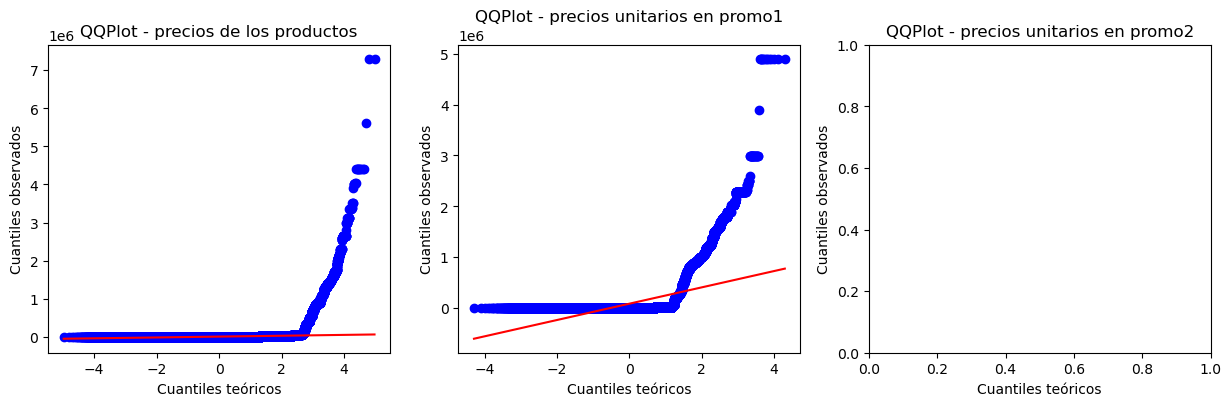

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

st.probplot(productos_sp_df['productos_precio_lista'], dist='norm', plot=ax[0])

ax[0].set_title("QQPlot - precios de los productos")
ax[0].set_xlabel("listado de precios")
ax[0].set_ylabel("Cuantiles observados")

st.probplot(productos_p1_df['productos_precio_unitario_promo1'], dist='norm', plot=ax[1])
ax[1].set_title("QQPlot - precios unitarios en promo1")
ax[1].set_xlabel("precios promocion 1")
ax[1].set_ylabel("Cuantiles observados")

st.probplot(productos_p2_df['productos_precio_unitario_promo2'], dist='norm', plot=ax[2])
ax[2].set_title("QQPlot - precios unitarios en promo2")
ax[2].set_xlabel("precios promocion 2")
ax[2].set_ylabel("Cuantiles observados")


plt.show()